## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from random import shuffle

from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d.axes3d import Axes3D

from sklearn.model_selection import train_test_split

## load data

#### In this project, we used Arabic Handwritten Digits Dataset 
Dataset contains 60,000 training images, and 10,000 test images (all images are in grayscale format).

Data link: https://www.kaggle.com/mloey1/ahdd1

In [2]:
train_data = pd.read_csv("csvTrainImages 60k x 784.csv")
train_label= pd.read_csv("csvTrainLabel 60k x 1.csv")

test_data=pd.read_csv("csvTestImages 10k x 784.csv")
test_label=pd.read_csv("csvTestLabel 10k x 1.csv")

In [4]:
np.array(train_data.iloc[0])

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [3]:
x_train=np.array(train_data)
x_test=np.array(test_data)

y_train=np.array(train_label)
y_test=np.array(test_label)

### Explore Data

In [55]:
x_train.shape

(59999, 784)

In [56]:
x_test.shape

(9999, 784)

##### each image has a total of 784 pixels (28 pixels in width and 28 pixels in height)
 

### Is the dataset balanced?


Text(0, 0.5, 'Count')

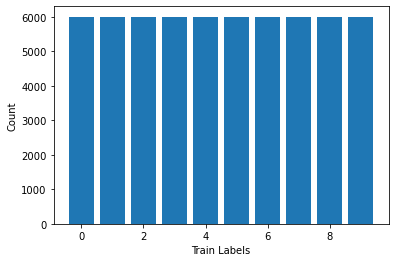

In [57]:
nums=[0,1,2,3,4,5,6,7,8,9]
plt.bar(nums,train_label.value_counts())
plt.xlabel('Train Labels')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

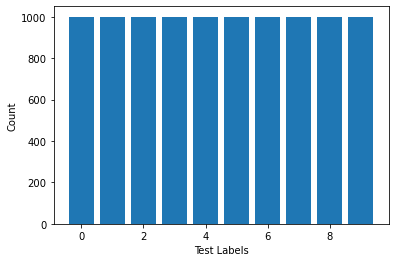

In [58]:
plt.bar(nums,test_label.value_counts())
plt.xlabel('Test Labels')
plt.ylabel('Count')

We have a balanced dataset as it contains an equal number of images from each class.

### Check for null values

In [59]:
# check if there is null pixels in train images



train_nulls=train_data.isnull().all()
train_nulls[train_nulls==True]


Series([], dtype: bool)

In [60]:
# check for train labels
train_label.isnull().value_counts()

0    
False    59999
dtype: int64

In [61]:
# check if there is null pixels in test images
test_nulls=test_data.isnull().all()
test_nulls[test_nulls==True]

Series([], dtype: bool)

In [62]:
# check for test labels 
test_label.isnull().value_counts()

0    
False    9999
dtype: int64

### Show images

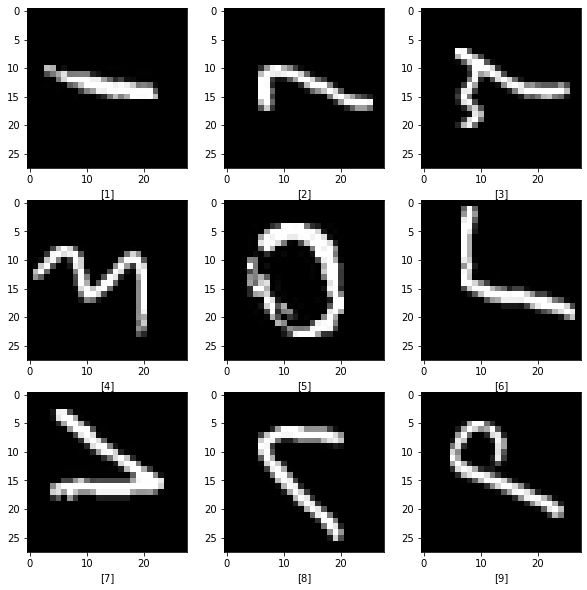

In [39]:
fig,ax= plt.subplots(3,3, figsize=(10,10))

for i in range(3):
    for j in range(3):
        ax[i][j].imshow(x_train[3*i+j].reshape(28,28), cmap='gray')
        ax[i][j].set_xlabel(y_train[3*i+j])

we need to reshape and transpose images

In [63]:
fun = lambda row : row.reshape(28,28).transpose()

x_train=np.apply_along_axis(fun,1,x_train)
x_test=np.apply_along_axis(fun,1,x_test)

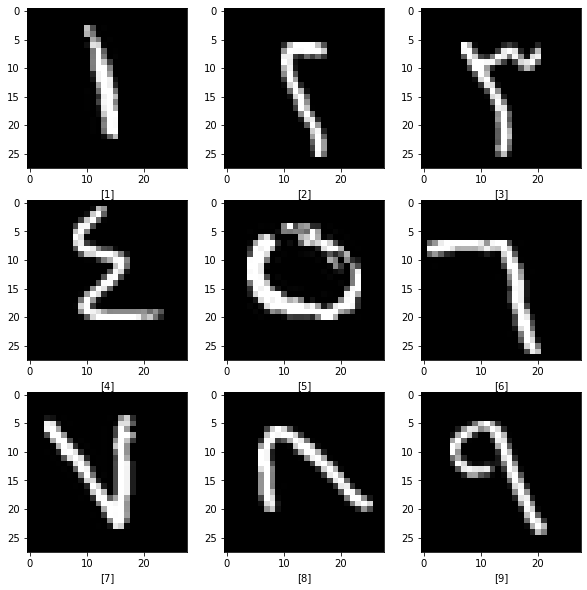

In [41]:
fig,ax= plt.subplots(3,3, figsize=(10,10))

for i in range(3):
    for j in range(3):
        ax[i][j].imshow(x_train[3*i+j], cmap='gray')
        ax[i][j].set_xlabel(y_train[3*i+j])

#### Since CNNs are designed to take an RGB image as input. we need to add dimension for the number of channels (with value of 1 because our images are in grayscale format)

In [64]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(y_test.shape[0],28,28,1)

### Visualize data with t-SNE algorithm

In [31]:
tsne_x = TSNE(n_components=3, init='random').fit_transform(np.array(train_data))

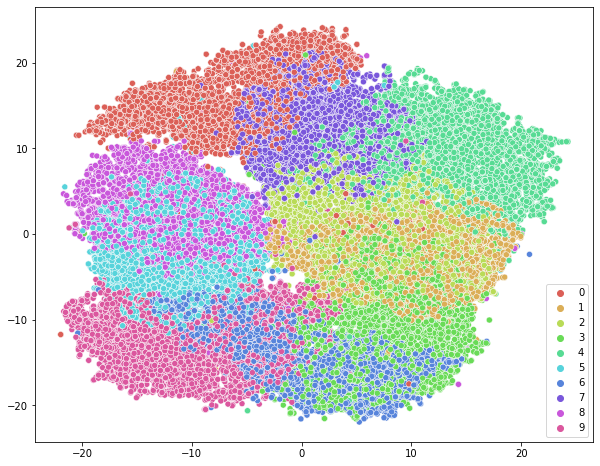

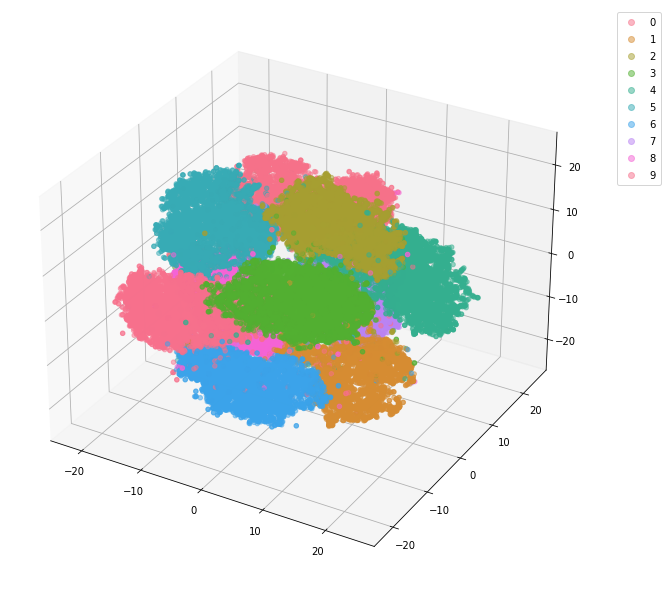

In [33]:
y=y_train.reshape(59999)

fig1=plt.figure(1,figsize=(10,8))
sns.scatterplot(x=tsne_x[:,0],y=tsne_x[:,1], hue=y,palette=sns.color_palette("hls", 10))

fig2=plt.figure(2, figsize=(10,8))
ax = Axes3D(fig2)
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

sc=ax.scatter(tsne_x[:,0], tsne_x[:,1],tsne_x[:,2],cmap=cmap, c=y, alpha=0.5)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

### Shuffle data

In [65]:
shuffle_ind=[i for i in range(x_train.shape[0])]
shuffle(shuffle_ind)

In [66]:
x_train=x_train[shuffle_ind]
y_train=y_train[shuffle_ind]

### Normalization

In [67]:
x_train=x_train/255.0
x_test= x_test/255.0

## Encode the labels

In [68]:
y_train = np.array(pd.get_dummies(pd.DataFrame(y_train), columns=[0]))
y_test =  np.array(pd.get_dummies(pd.DataFrame(y_test), columns=[0]))

### split data into training and validation set

In [72]:
x_train, x_val,y_train, y_val=train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)